In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import ncreate3d as nc
import os
from config import cfg

### Create nozzle geometry. This will export mesh variables

In [23]:
help(nc.NozVars.__init__)

Help on function __init__ in module nCreateMesh:

__init__(self, bathWidth: float = 16, bathHeight: float = 7, bathDepth: float = 7, frontWidth: float = 4, vink: float = 10, vbath: float = 10, npts: int = 50, nozzleInnerWidth: float = 0.603, nozzleThickness: float = 0.152)
    Allowed input variables:
    bathWidth: (default=16) bath width in nozzle inner diameters
    bathHeight: (default=7) bath height in nozzle inner diameters
    bathDepth: (default=7) bath depth  in nozzle inner diameters
    frontWidth: (default=4) front of nozzle bath width  in nozzle inner diameters
    vink: (default=10) ink extrusion speed in mm/s
    vbath: (default=10) bath translation speed in mm/s
    npts: (default=50) number of points in the circle used to define the nozzle
    nozzleInnerWidth: (default=0.603) inner diameter of the nozzle in mm
    nozzleThickness: (default=0.152) nozzle wall thickness in mm



In [31]:
help(nc.genericMesh)

Help on function genericMesh in module ncreate3d:

genericMesh(parentFolder: str, **kwargs) -> ncreate3d.FileGroup
    This generates a folder with mesh and geometry files, but nothing else important. If you want to customize the nozzle, input keyword variables. e.g. genericMesh(myFolder, bathWidth=16)



In [8]:
cfg.path.fig

'C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries'

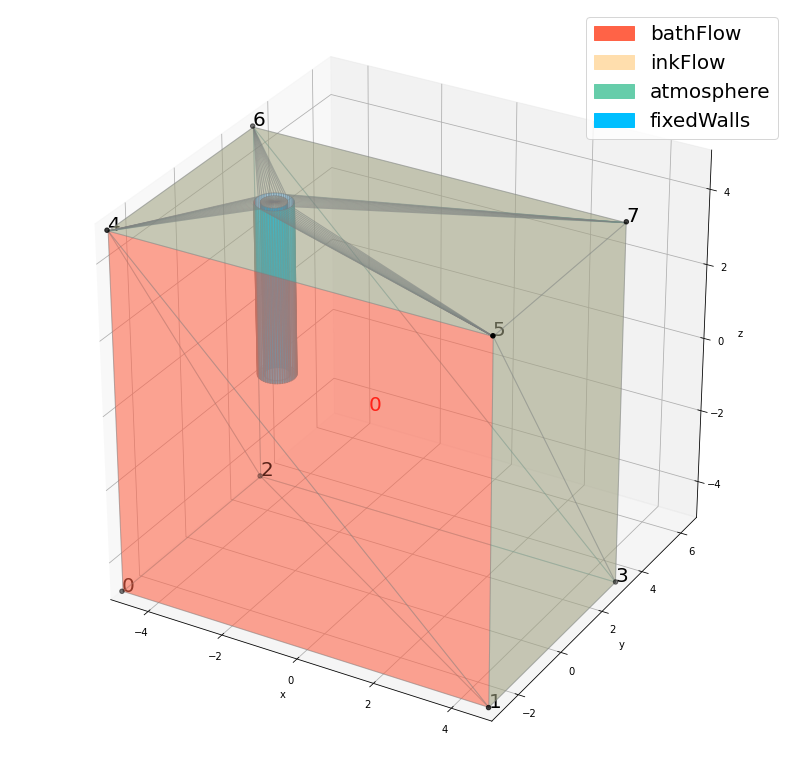

In [10]:
fg = nc.genericMesh(os.path.join(cfg.path.c, 'LapRDTall'), npts=50, bathDepth=16, bathHeight=10) # generate mesh files
fg.plot.savefig(os.path.join(cfg.path.fig, 'yieldingsweep','plots', 'LapRDTall', 'nozzleDiagramTall.png')) # export the diagram of the nozzle

## Generate simulation files

Usage:
<br>e.g. To create a Newtonian fluid of viscosity 1000 Pa s and density 1100 kg/m^3:
<br>&nbsp;&nbsp;&nbsp;&nbsp;`myFluid = nc.Fluid(nu=1000, rho=1100, units='Pas')`
<br>or to create a Newtonian fluid of viscosity 1000 Pa s and density 1000 kg/m^3:
<br>&nbsp;&nbsp;&nbsp;&nbsp;`myFluid = nc.Fluid(nu=1000, units='Pa')`
<br>e.g. To create a Herschel-Bulkley fluid of plateau viscosity 4 Pas, yield stress 1 Pa, consistency index 10, power law index 0.5:
<br>&nbsp;&nbsp;&nbsp;&nbsp;`myFluid = nc.Fluid(nu0=4, tau0=1, k=10, n=0.5, units="Pa")`
<br>You can also give the fluid a label, but the label won't be used during file generation. You need to use it separately.
<br>&nbsp;&nbsp;&nbsp;&nbsp;`myFluid = nc.Fluid(label='myLabel', nu0=4, tau0=1, k=10, n=0.5, units="Pa")`
<br><br>
<br>To create a simulation folder, use genericExport.
<br>&nbsp;&nbsp;&nbsp;&nbsp;`nc.genericExport(folderNumber, fluid1, fluid2, surfaceTension, parentFolder, exportMesh=False)`
<br>To create a simulation folder with its own mesh files, use exportMesh=True.
<br>&nbsp;&nbsp;&nbsp;&nbsp;`nc.genericExport(folderNumber, fluid1, fluid2, surfaceTension, parentFolder, exportMesh=True)`

In [ ]:
topfolder = os.path.join(cfg.c, 'HBHByielded', 'LapRD') # this is the parent folder that holds everything
ii = 1100
sigma = 0

LapRD225 = nc.Fluid(units="Pa", label=225, tau0=0.21394, k=3.248436, n=0.14201, nu0=4.05384)
LapRD250 = nc.Fluid(units="Pa", label=250, tau0=0.82365, k=9.692119, n=0.112515, nu0=11.8239)
LapRD275 = nc.Fluid(units="Pa", label=275, tau0=2.07291, k=22.74276, n=0.054603, nu0=22.6813)
LapRD300 = nc.Fluid(units="Pa", label=300, tau0=6.72765, k=75.69318, n=0.022874, nu0=73.66575)
LapRD350 = nc.Fluid(units="Pa", label=350, tau0=26.8672, k=182.7635, n=0, nu0=99.1863)
LapRD400 = nc.Fluid(units="Pa", label=400, tau0=93.9063, k=181.8893, n=0.021436, nu0=219.404)

inks = [LapRD225, LapRD250, LapRD275, LapRD300, LapRD350, LapRD400]

for link in inks:
    for lsup in inks:
        nc.genericExport(ii, lsup, link, sigma, topfolder, exportMesh=False)
        
        # create an additional file that notes the fluid labels
        name = 'I_'+'{:.2f}'.format(lsup.label/100)+'_S_'+'{:.2f}'.format(link.label/100)
        nc.exportFile(os.path.join(topfolder, 'nb'+str(ii)), name+'.txt', name)
        
        ii+=1

In [11]:
topfolder = os.path.join(cfg.path.c, 'LapRDTall') # this is the parent folder that holds everything
ii = 1136
sigma = 0

LapRD225 = nc.Fluid(units="Pa", label='LapRD_2.25', tau0=0.21394, k=3.248436, n=0.14201, nu0=4.05384)
LapRD250 = nc.Fluid(units="Pa", label='LapRD_2.50', tau0=0.82365, k=9.692119, n=0.112515, nu0=11.8239)
LapRD275 = nc.Fluid(units="Pa", label='LapRD_2.75', tau0=2.07291, k=22.74276, n=0.054603, nu0=22.6813)
LapRD300 = nc.Fluid(units="Pa", label='LapRD_3.00', tau0=6.72765, k=75.69318, n=0.022874, nu0=73.66575)
LapRD350 = nc.Fluid(units="Pa", label='LapRD_3.50', tau0=26.8672, k=182.7635, n=0, nu0=99.1863)
LapRD400 = nc.Fluid(units="Pa", label='LapRD_4.00', tau0=93.9063, k=181.8893, n=0.021436, nu0=219.404)

inks = [LapRD225, LapRD250, LapRD275, LapRD300, LapRD350, LapRD400]

for link in inks:
    for lsup in inks:
        nc.genericExport(ii, lsup, link, sigma, topfolder, exportMesh=False)
        ii+=1

INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\LapRDTall\nb1136
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\LapRDTall\nb1136\case
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\LapRDTall\nb1136\case\0
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\LapRDTall\nb1136\case\constant
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\LapRDTall\nb1136\case\system
INFO:root:Exported file C:/Users/lmf1/Documents/OpenFOAM\LapRDTall\nb1136\legend.csv
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\LapRDTall\nb1137
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\LapRDTall\nb1137\case
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\LapRDTall\nb1137\case\0
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\LapRDTall\nb1137\case\constant
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\LapRDTall\nb1137\case\system
INFO:root:Exported file C:/Users/lmf1/Documents/OpenFOAM\La

In [ ]:
topfolder = os.path.join(cfg.c, 'HBHByielded', 'mineral') # this is the parent folder that holds everything
ii = 1136
sigma = 50

LapRD225 = nc.Fluid(units="Pa", label=225, tau0=0.21394, k=3.248436, n=0.14201, nu0=4.05384)
LapRD250 = nc.Fluid(units="Pa", label=250, tau0=0.82365, k=9.692119, n=0.112515, nu0=11.8239)
LapRD275 = nc.Fluid(units="Pa", label=275, tau0=2.07291, k=22.74276, n=0.054603, nu0=22.6813)
LapRD300 = nc.Fluid(units="Pa", label=300, tau0=6.72765, k=75.69318, n=0.022874, nu0=73.66575)
LapRD350 = nc.Fluid(units="Pa", label=350, tau0=26.8672, k=182.7635, n=0, nu0=99.1863)
LapRD400 = nc.Fluid(units="Pa", label=400, tau0=93.9063, k=181.8893, n=0.021436, nu0=219.404)

M4 = nc.Fluid(units="Pa", label=4, tau0=0.00115802, k=0.608086087, n=0.372992316, nu0=0.517817)
M5 = nc.Fluid(units="Pa", label=5, tau0=0.00193243, k=2.141788809, n=0.261973847, nu0=5.18455)
M6 = nc.Fluid(units="Pa", label=6, tau0=0.707707, k=0.662714574, n=0.785194409, nu0=6.80455)
M7 = nc.Fluid(units="Pa", label=7, tau0=0.734113, k=4.110580188, n=0.377033518, nu0=12.4988)
M8 = nc.Fluid(units="Pa", label=8, tau0=1.53334, k=7.69231033, n=0.2809392, nu0=26.8529)
M9 = nc.Fluid(units="Pa", label=9, tau0=2.3897, k=15.02968127, n=0.23001382, nu0=42.4867)

sups = [LapRD225, LapRD250, LapRD275, LapRD300, LapRD350, LapRD400]
inks = [M4, M5, M6, M7, M8, M9]

for link in inks:
    for lsup in sups:
        nc.genericExport(ii, lsup, link, sigma, topfolder, exportMesh=False)
        
        # create an additional file that notes the fluid labels
        name = 'I_'+'M{:.2f}'.format(link.label)+'_S_'+'{:.2f}'.format(lsup.label/100)
        nc.exportFile(os.path.join(topfolder, 'nb'+str(ii)), name+'.txt', name)
        
        ii+=1

In [13]:
cfolder = os.path.join(cfg.path.c,'LapRDTall')
for f in os.listdir(cfolder):
    if f.startswith('nb') and not f.startswith('nb1100') and not f.startswith('nb1101'):
        print(f)
        allrun = nc.compileAllRun(f, 'interFoam')
        nc.exportFile(os.path.join(cfolder, f, 'case'), 'Allrun.sh', allrun, linux=True)
        slurm = nc.compileSlurm(f, r'/working/lmf1/LapRDTall')
        nc.exportFile(os.path.join(cfolder, f, 'case'), 'run.slurm', slurm, linux=True)

nb1136
nb1137
nb1138
nb1139
nb1140
nb1141
nb1142
nb1143
nb1144
nb1145
nb1146
nb1147
nb1148
nb1149
nb1150
nb1151
nb1152
nb1153
nb1154
nb1155
nb1156
nb1157
nb1158
nb1159
nb1160
nb1161
nb1162
nb1163
nb1164
nb1165
nb1166
nb1167
nb1168
nb1169
nb1170
nb1171
